In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader


['aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball bat', 'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer', 'bus', 'bush', 'butterfly', 'cactus', 'cake', 'calculator', 'calendar', 'camel', 'camera', 'camouflage', 'campfire', 'candle', 'cannon', 'canoe', 'car', 'carrot', 'castle', 'cat']


In [2]:
X, y = image_data_loader()

In [3]:
len(X)

59329

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

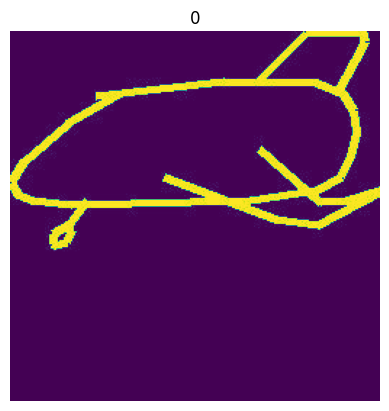

In [5]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [6]:
from sklearn.utils import shuffle

In [7]:
X, y = shuffle(X, y)

In [8]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [9]:
train_X, test_X, val_X = split_to_train_test(X)

47463 5932 5934


In [10]:
train_y, test_y, val_y = split_to_train_test(y)


47463 5932 5934


In [11]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(47463, 255, 255, 1)

In [12]:
IMG_SIZE = 28
train_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), train_X)))
val_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), val_X)))
test_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), test_X)))

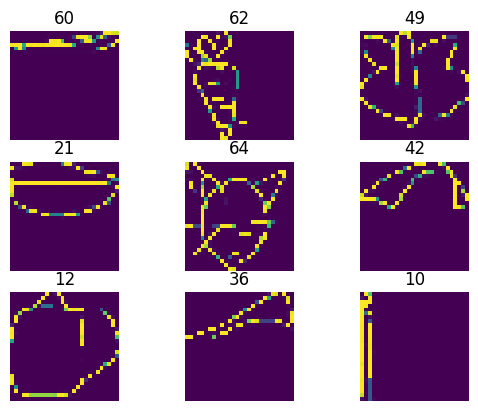

In [13]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [14]:
import pandas as pd

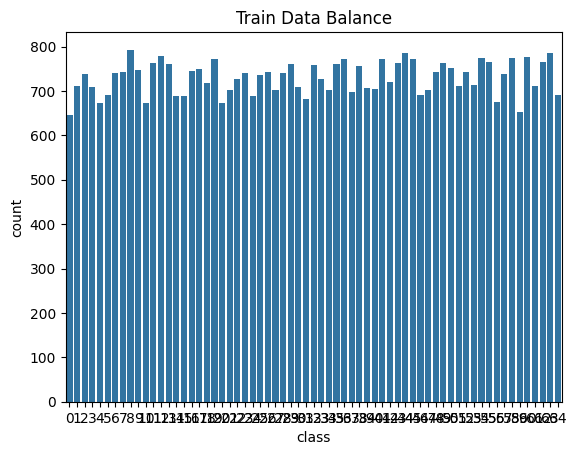

In [15]:
plt.title('Train Data Balance')
classes_df = pd.DataFrame({'class': train_y})
sns.countplot(data=classes_df, x='class');

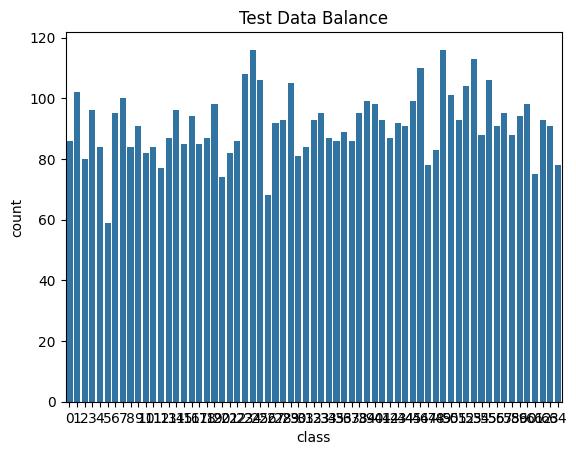

In [16]:
plt.title('Test Data Balance')
classes_df = pd.DataFrame({'class': test_y})
sns.countplot(data=classes_df, x='class');

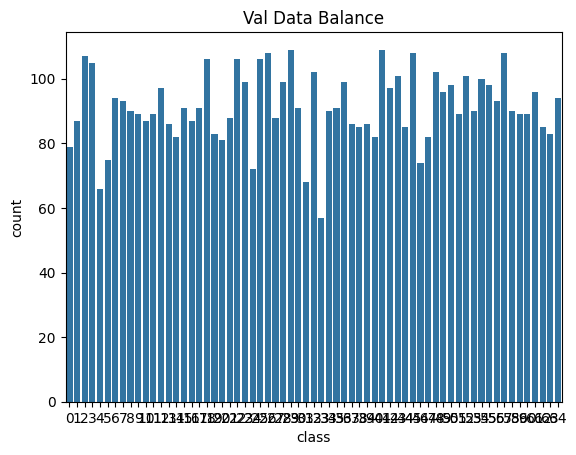

In [17]:
plt.title('Val Data Balance')
classes_df = pd.DataFrame({'class': val_y})
sns.countplot(data=classes_df, x='class');

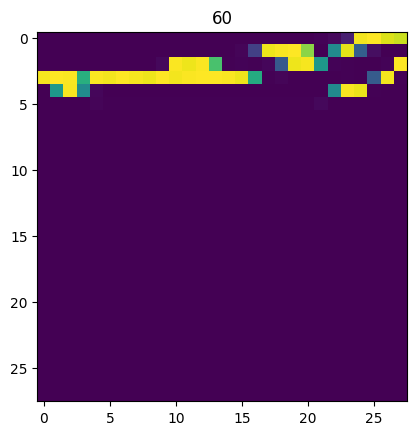

In [18]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [19]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [20]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [21]:
input_shape = train_X.shape[1:]
input_shape

(28, 28, 1)

In [22]:
from data_loader import categories

In [23]:
num_classes = len(categories)
num_classes

65

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.5, 0.2)
])

In [79]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(30, (5, 5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(15, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [80]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [81]:
from tensorflow.keras import callbacks

In [82]:
cbs = [
    callbacks.ModelCheckpoint(
        'model_saves',
        save_weights_only=True
    ),
    callbacks.EarlyStopping(
        patience=3,
        min_delta=0.001
    )
]

In [83]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=30,
    batch_size=512,
    verbose=2,
    callbacks=cbs,
    shuffle=True
)

Epoch 1/30
93/93 - 4s - loss: 3.7305 - accuracy: 0.1086 - val_loss: 4.0651 - val_accuracy: 0.0268 - 4s/epoch - 48ms/step
Epoch 2/30
93/93 - 3s - loss: 2.8844 - accuracy: 0.2662 - val_loss: 4.4576 - val_accuracy: 0.0396 - 3s/epoch - 37ms/step
Epoch 3/30
93/93 - 3s - loss: 2.4425 - accuracy: 0.3606 - val_loss: 4.2364 - val_accuracy: 0.0607 - 3s/epoch - 37ms/step
Epoch 4/30
93/93 - 3s - loss: 2.1797 - accuracy: 0.4188 - val_loss: 3.3576 - val_accuracy: 0.1892 - 3s/epoch - 37ms/step
Epoch 5/30
93/93 - 3s - loss: 2.0246 - accuracy: 0.4566 - val_loss: 2.4849 - val_accuracy: 0.3605 - 3s/epoch - 37ms/step
Epoch 6/30
93/93 - 3s - loss: 1.8990 - accuracy: 0.4848 - val_loss: 1.8981 - val_accuracy: 0.4931 - 3s/epoch - 37ms/step
Epoch 7/30
93/93 - 3s - loss: 1.8250 - accuracy: 0.5013 - val_loss: 1.6464 - val_accuracy: 0.5563 - 3s/epoch - 37ms/step
Epoch 8/30
93/93 - 3s - loss: 1.7555 - accuracy: 0.5195 - val_loss: 1.5531 - val_accuracy: 0.5785 - 3s/epoch - 37ms/step
Epoch 9/30
93/93 - 4s - loss: 1.

In [84]:
model.evaluate(test_X, test_y)

186/186 [==============================] - 0s 2ms/step - loss: 1.3042 - accuracy: 0.6433


[1.3042192459106445, 0.643290638923645]

In [85]:
pred = model.predict(test_X)

186/186 [==============================] - 0s 1ms/step


In [86]:
np.argmax(pred[0])

44

In [87]:
test_y[0]

44

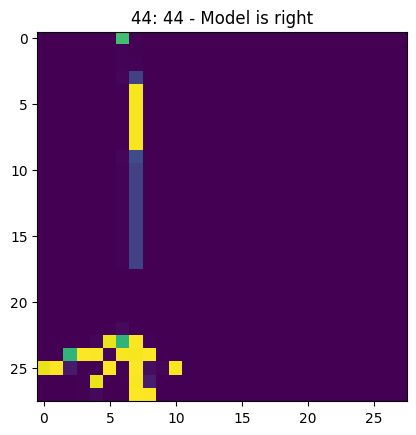

In [88]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

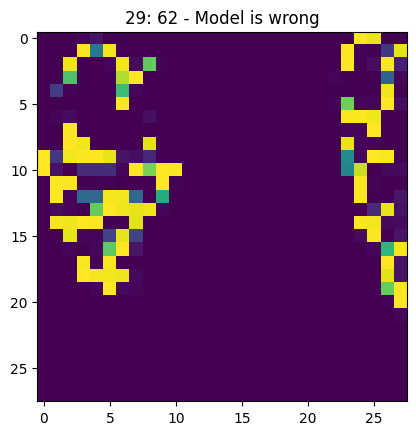

In [89]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])

In [93]:
def create_model():
    model = Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        layers.Conv2D(30, (5, 5), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(15, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [94]:
model1 = create_model()
model1.load_weights('model_saves')

In [95]:
model1.evaluate(test_X, test_y)

186/186 [==============================] - 0s 2ms/step - loss: 1.3042 - accuracy: 0.6433


[1.3042192459106445, 0.643290638923645]

**Sad you can't see my happiness...** <br>
**But now I'm moving one of the stickers to DONE on my kanban board**

In [96]:
import os
from PIL import Image

In [97]:
def user_data(image_path):
    X = []
    img = np.asarray(Image.open(image_path).convert('L'))
    img = np.expand_dims(img, axis=2)
    print(img.shape)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    print(img.shape)
    X.append(img)
    plt.imshow(img)
    return X

In [111]:
categories[:3]

['aircraft carrier', 'airplane', 'alarm clock']

(536, 858, 1)
(28, 28, 1)


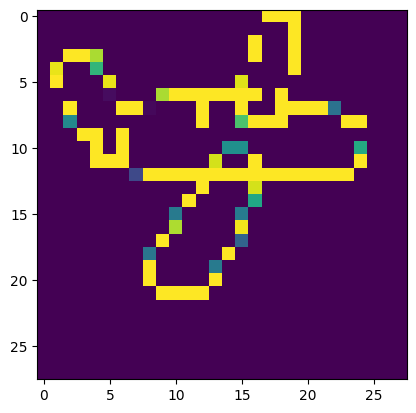

In [112]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/plane.png')

In [113]:
user_img_mr = np.expand_dims(user_img_mr, axis=3)

In [114]:
pred = model1.predict(user_img_mr)

1/1 [==============================] - 0s 17ms/step


In [115]:
user_img_mr[0].shape

(28, 28, 1, 1)

In [116]:
enc = {}
for i in range(len(categories)):
    enc[i] = categories[i]

In [117]:
result = user_img_mr[0, :, :, 0]
result.shape

(28, 28, 1)

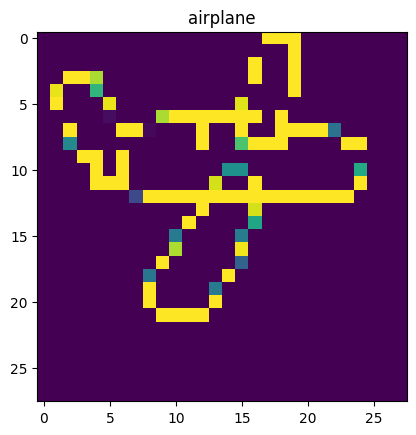

In [118]:
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

HELL YEAH IT IS!!!

(538, 572, 1)
(28, 28, 1)
1/1 [==============================] - 0s 17ms/step


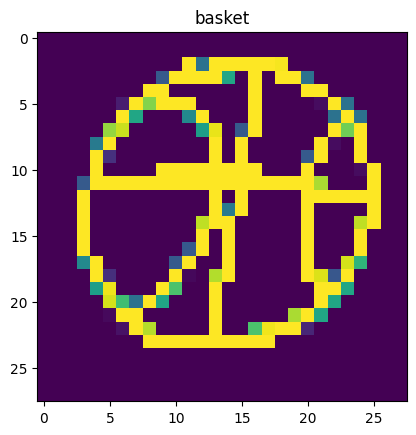

In [119]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/ball.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

CLOSE... SOOOOOO CLOSE

(256, 266, 1)
(28, 28, 1)
1/1 [==============================] - 0s 26ms/step


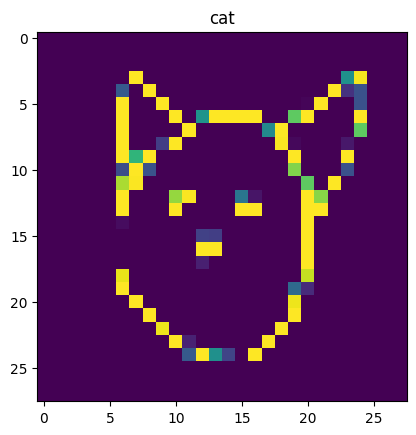

In [120]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Cat.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

(478, 453, 1)
(28, 28, 1)
1/1 [==============================] - 0s 17ms/step


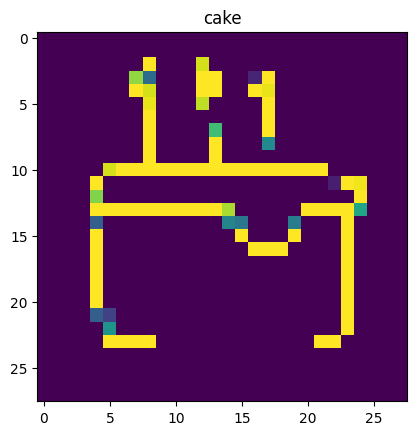

In [122]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Cake.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

# WE Won